<a href="https://colab.research.google.com/github/hksantosh/sscm/blob/main/capstone/Intelligent_Supplier_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ortools.linear_solver import pywraplp

from sklearn import svm
from sklearn import tree
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import data_table

pd.set_option('display.max_columns', None)

data_table.enable_dataframe_formatter()
data_table.max_columns = 30

In [ ]:
# read file
DF = pd.read_csv('supplier-data.csv')
DF = DF.set_index('Supplier ID')

In [ ]:
DF

,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,Environmental impact,Social responsibility,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
Supplier ID,,,,,,,,,,,,,,,,,,,,,
1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,Bad,0.478,0.806,0.359,0.130,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,1
1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,Good,0.713,0.776,0.759,0.033,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,2
1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,Excellent,0.805,0.465,0.549,0.060,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,2
1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,Average,0.847,0.091,0.054,0.209,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,1
1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,Bad,0.578,0.989,0.219,0.351,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,0.201,0.260,0.060,0.823,0.220,0.745,0.614,Average,0.804,0.543,0.892,0.269,0.010,0.502,0.154,0.547,0.407,0.813,0.135,0.277,1
1997,0.128,0.408,0.611,0.774,0.351,0.615,0.114,Bad,0.359,0.910,0.016,0.507,0.652,0.212,0.135,0.596,0.996,0.081,0.069,0.905,1
1998,0.910,0.308,0.381,0.818,0.671,0.500,0.031,Average,0.374,0.734,0.469,0.470,0.401,0.677,0.072,0.744,0.520,0.748,0.069,0.403,1


In [ ]:
DF.shape

(1000, 21)

In [ ]:
DF.describe()

,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Financial stability,Environmental impact,Social responsibility,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
count,1000.000000,999.000000,1000.000000,998.000000,998.000000,999.000000,998.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,999.000000,999.000000,1000.000000,999.000000,999.000000,1000.000000
mean,0.487184,0.510847,0.500643,0.513186,0.503326,0.505993,0.518637,0.491741,0.513256,0.506644,0.500012,0.504658,0.497444,0.494643,0.489079,0.500069,0.501644,0.500696,0.497949,1.272000
std,0.289946,0.283552,0.294141,0.285107,0.294474,0.286334,0.286429,0.290615,0.290597,0.290358,0.291850,0.294110,0.284664,0.283233,0.290497,0.293173,0.285467,0.294314,0.292739,0.445213
min,0.001000,0.001000,0.000000,0.003000,0.003000,0.001000,0.001000,0.000000,0.001000,0.000000,0.000000,0.001000,0.001000,0.000000,0.001000,0.002000,0.000000,0.001000,0.002000,1.000000
25%,0.236500,0.276000,0.233000,0.271000,0.244000,0.262000,0.272500,0.230000,0.259000,0.245750,0.240000,0.247750,0.253750,0.250750,0.229500,0.240500,0.263750,0.239500,0.249000,1.000000
50%,0.481500,0.506000,0.503000,0.511500,0.511000,0.508000,0.529500,0.487000,0.530000,0.517500,0.515000,0.495500,0.487500,0.494000,0.486000,0.508000,0.507500,0.496000,0.487000,1.000000
75%,0.735250,0.753000,0.761750,0.760750,0.762000,0.746000,0.767750,0.742250,0.767250,0.748250,0.750000,0.768250,0.750000,0.734250,0.749500,0.764500,0.744250,0.746000,0.767000,2.000000
max,0.999000,0.994000,0.999000,0.998000,0.997000,1.000000,0.998000,0.998000,0.999000,0.999000,1.000000,0.998000,1.000000,1.000000,0.998000,1.000000,0.999000,0.999000,1.000000,2.000000


In [ ]:
# In the target column, replace 1 with 0 and 2 with 1. So that the defaulters will become positive class.
DF['Supplier’s default'] = DF['Supplier’s default'].replace([1], 0)
DF['Supplier’s default'] = DF['Supplier’s default'].replace([2], 1)
DF.head()

,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,Environmental impact,Social responsibility,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
Supplier ID,,,,,,,,,,,,,,,,,,,,,
1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,Bad,0.478,0.806,0.359,0.130,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,0
1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,Good,0.713,0.776,0.759,0.033,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,1
1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,Excellent,0.805,0.465,0.549,0.060,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,1
1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,Average,0.847,0.091,0.054,0.209,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,0
1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,Bad,0.578,0.989,0.219,0.351,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,0


In [ ]:
# Manual hot encoding
DF['Reputation'] = DF['Reputation'].replace(['Excellent','Good','Average','Bad'], [1,.66,.33,0])
DF.head()

,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,Environmental impact,Social responsibility,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
Supplier ID,,,,,,,,,,,,,,,,,,,,,
1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,0.00,0.478,0.806,0.359,0.130,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,0
1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,0.66,0.713,0.776,0.759,0.033,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,1
1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,1.00,0.805,0.465,0.549,0.060,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,1
1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,0.33,0.847,0.091,0.054,0.209,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,0
1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,0.00,0.578,0.989,0.219,0.351,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,0


In [ ]:
# Check Null values
print(DF.isnull().sum())
DF = DF.dropna()

print(DF.isnull().sum())
DF.head()
#DF[DF.isnull()]
# imputation for the missing values ?

Cost                     0
Quality                  1
Delivery time            0
Reliability              2
Flexibility              2
Capacity                 1
Innovation               2
Reputation               2
Financial stability      0
Environmental impact     0
Social responsibility    0
Safety record            0
Technical expertise      0
Customer service         0
Lead time                0
Responsiveness           1
Contract terms           1
Diversity                0
Sustainability           1
Scalability              1
Supplier’s default       0
dtype: int64
Cost                     0
Quality                  0
Delivery time            0
Reliability              0
Flexibility              0
Capacity                 0
Innovation               0
Reputation               0
Financial stability      0
Environmental impact     0
Social responsibility    0
Safety record            0
Technical expertise      0
Customer service         0
Lead time                0
Responsiveness 

,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,Environmental impact,Social responsibility,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
Supplier ID,,,,,,,,,,,,,,,,,,,,,
1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,0.00,0.478,0.806,0.359,0.130,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,0
1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,0.66,0.713,0.776,0.759,0.033,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,1
1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,1.00,0.805,0.465,0.549,0.060,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,1
1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,0.33,0.847,0.091,0.054,0.209,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,0
1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,0.00,0.578,0.989,0.219,0.351,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,0


In [ ]:
# staistical measures
DF.describe()

,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,Environmental impact,Social responsibility,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,0.485868,0.511052,0.501529,0.514302,0.502995,0.507945,0.518802,0.496247,0.492067,0.511704,0.506998,0.499900,0.505164,0.494641,0.492111,0.487427,0.499318,0.503057,0.499976,0.497986,0.269777
std,0.289884,0.283614,0.294771,0.285105,0.294783,0.286185,0.286393,0.378222,0.290884,0.290765,0.289919,0.292874,0.293812,0.284634,0.283279,0.290364,0.293479,0.285008,0.294599,0.292633,0.444069
min,0.001000,0.001000,0.000000,0.003000,0.003000,0.004000,0.001000,0.000000,0.000000,0.001000,0.000000,0.000000,0.001000,0.001000,0.000000,0.001000,0.002000,0.000000,0.001000,0.002000,0.000000
25%,0.235000,0.276250,0.233500,0.271250,0.244000,0.264000,0.272500,0.000000,0.230000,0.258250,0.247250,0.237000,0.248500,0.252000,0.246750,0.229000,0.240000,0.264500,0.238250,0.248500,0.000000
50%,0.481000,0.506500,0.503000,0.514000,0.511000,0.510500,0.530500,0.330000,0.487500,0.530000,0.518500,0.515000,0.494000,0.484000,0.492500,0.485000,0.507000,0.509500,0.495500,0.487500,0.000000
75%,0.733750,0.752500,0.764000,0.761750,0.763500,0.748750,0.767750,1.000000,0.743000,0.767000,0.747750,0.751750,0.767750,0.749750,0.731000,0.748750,0.764750,0.744750,0.746000,0.767000,1.000000
max,0.999000,0.994000,0.999000,0.998000,0.997000,1.000000,0.998000,1.000000,0.998000,0.999000,0.999000,1.000000,0.998000,1.000000,1.000000,0.998000,1.000000,0.999000,0.999000,1.000000,1.000000


In [ ]:
scaled_df = DF

In [ ]:
# understand correlation
correlation = scaled_df.corr()

<Axes: >

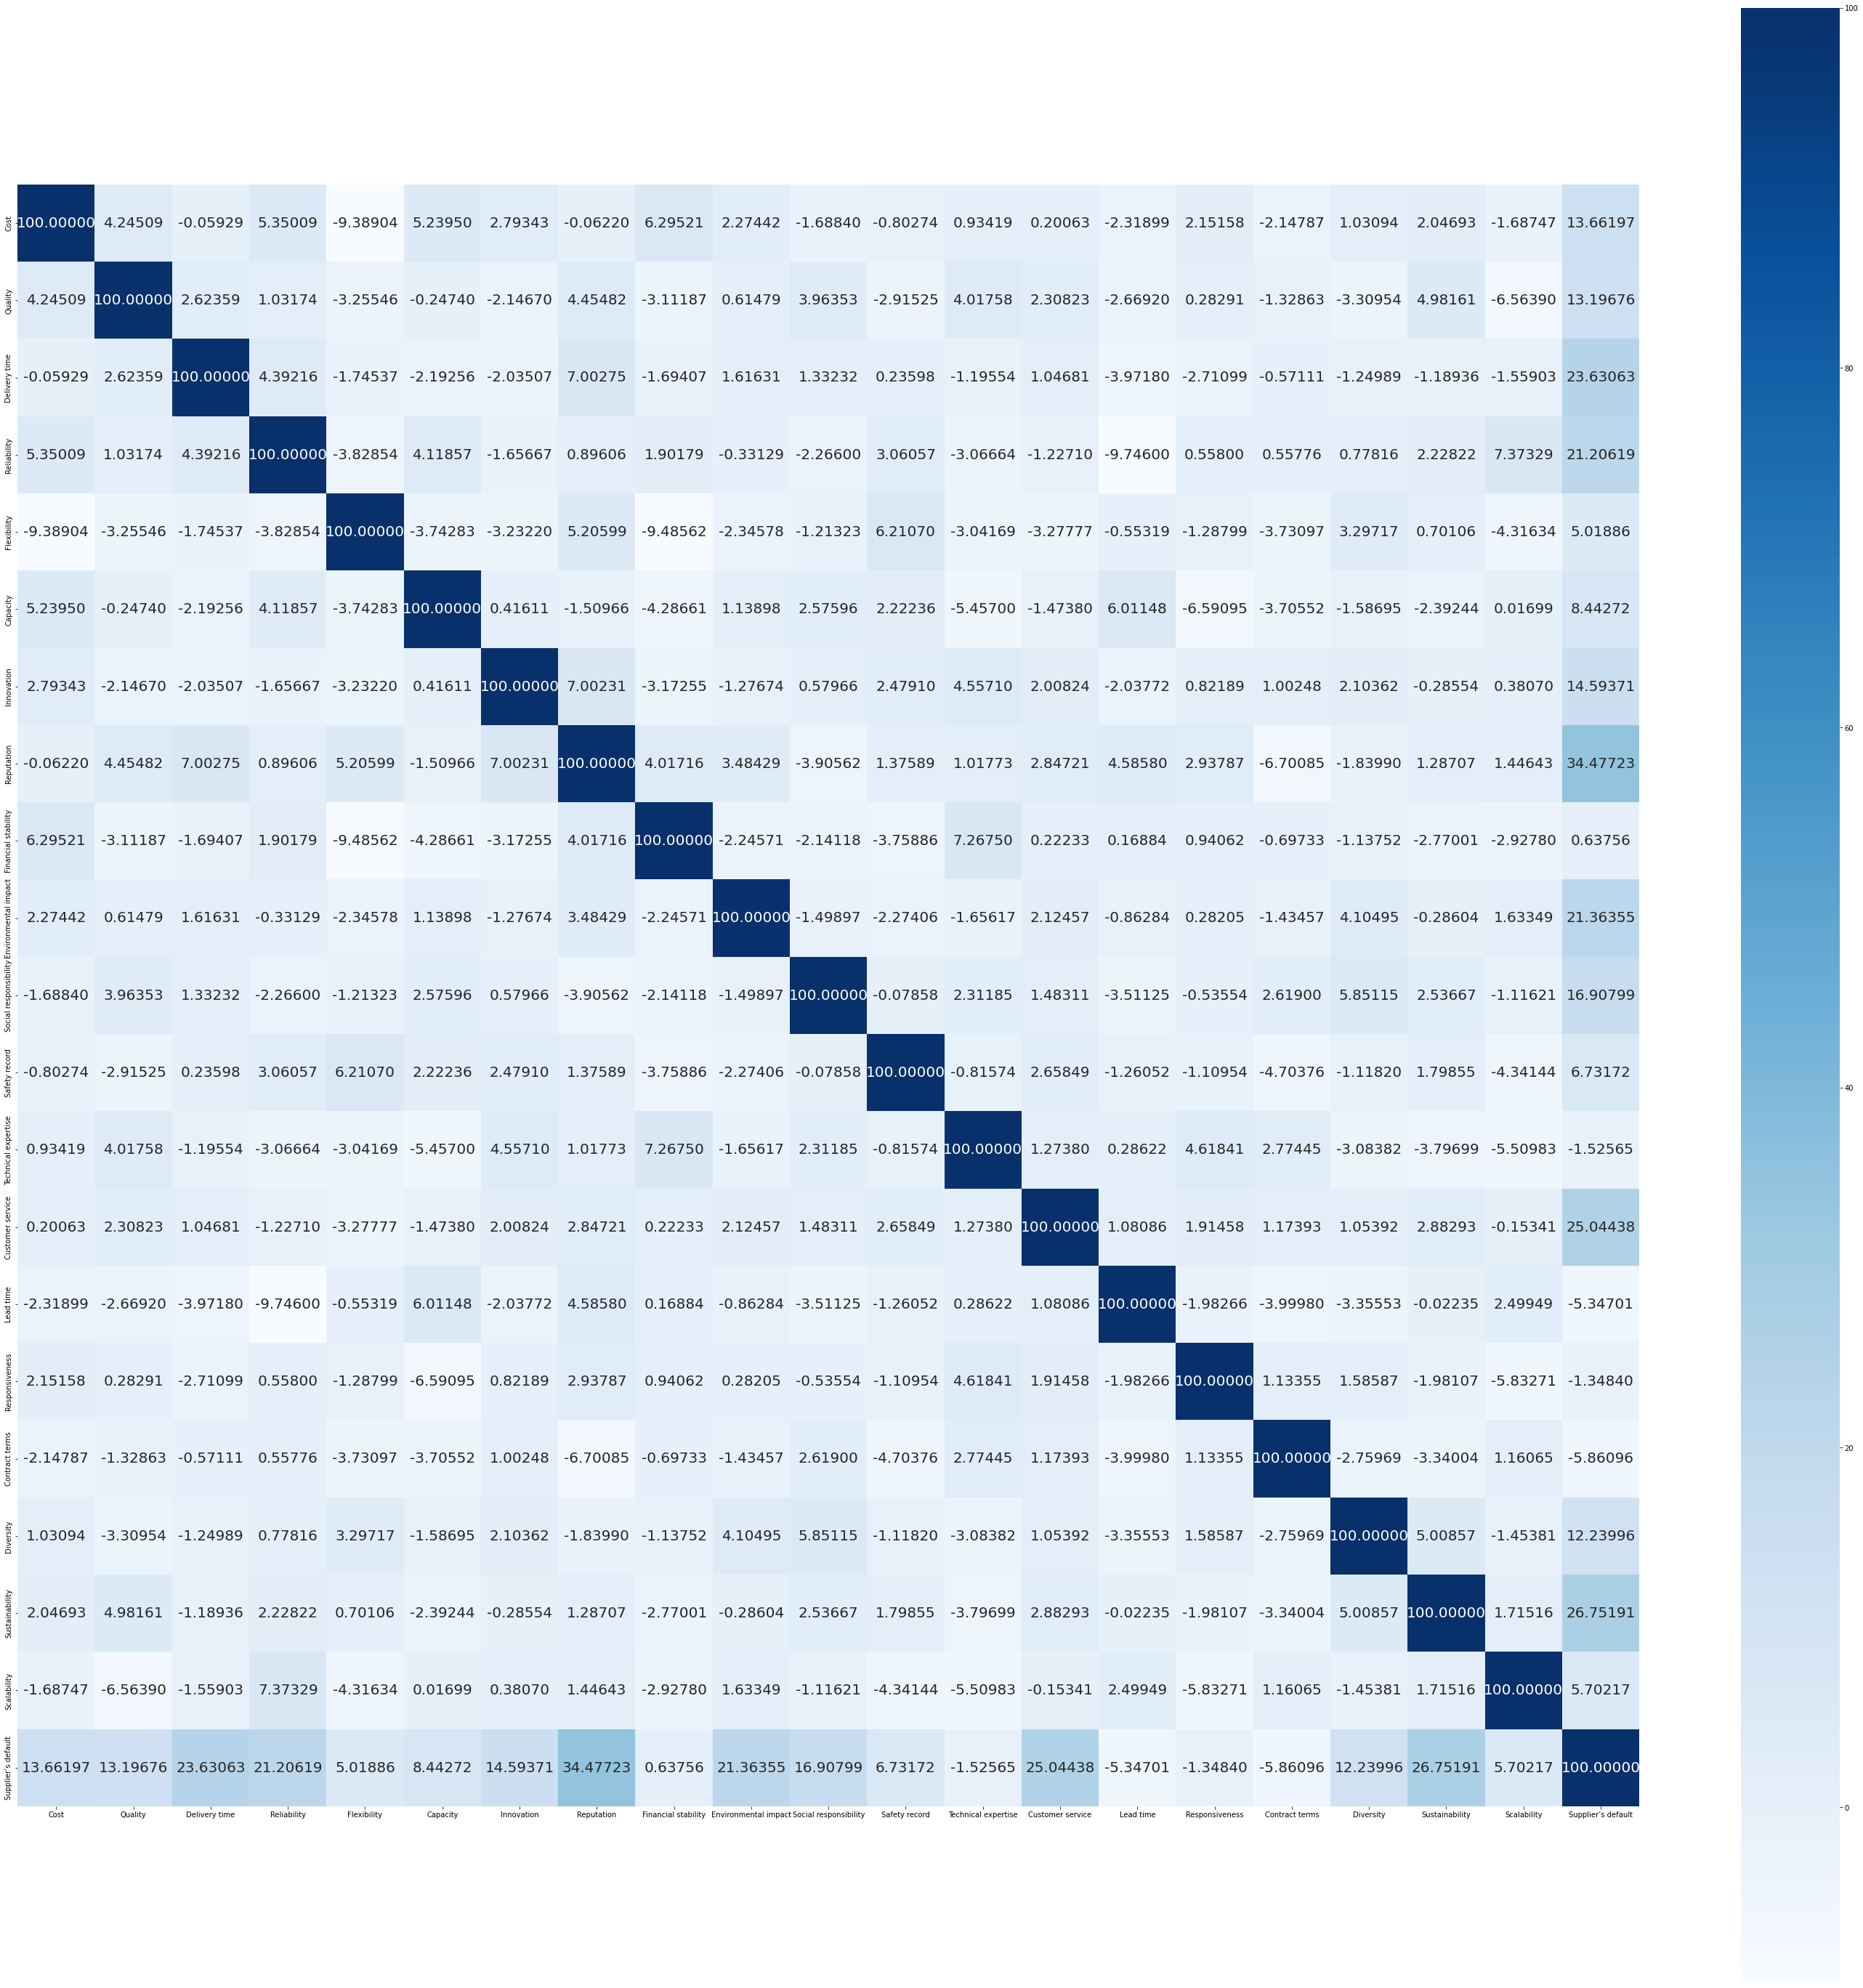

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(correlation*100, cbar=True, square=True, fmt='.5f', annot=True, annot_kws={'size':20}, cmap='Blues')

In [ ]:
# splitting the data into features and target
X = scaled_df.drop(['Supplier’s default'], axis=1)
Y = scaled_df['Supplier’s default']
Y1 = pd.DataFrame(Y)

print(X)
print(Y)

              Cost  Quality  Delivery time  Reliability  Flexibility  \
Supplier ID                                                            
1001         0.874    0.758          0.082        0.114        0.082   
1002         0.972    0.694          0.955        0.963        0.244   
1003         0.827    0.413          0.199        0.577        0.127   
1004         0.422    0.555          0.969        0.760        0.773   
1005         0.767    0.958          0.915        0.719        0.715   
...            ...      ...            ...          ...          ...   
1996         0.201    0.260          0.060        0.823        0.220   
1997         0.128    0.408          0.611        0.774        0.351   
1998         0.910    0.308          0.381        0.818        0.671   
1999         0.408    0.271          0.921        0.648        0.948   
2000         0.518    0.319          0.344        0.597        0.704   

             Capacity  Innovation  Reputation  Financial stabil

In [ ]:
# Exploratory data analysis: Perform exploratory data analysis to identify which factors differentiate/influences customers who are defaulting with others.
# Data Imbalance: Identify whether the target column is balanced or imbalanced. Plot the same using
# a simple pie chart.
# Convert all categorical columns to numerical columns using one hot encoding.


In [ ]:
# split into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 99999999)
print(X.shape, X_train.shape, X_test.shape, Y.shape, Y_train.shape, Y_test.shape, Y1.shape)

(986, 20) (788, 20) (198, 20) (986,) (788,) (198,) (986, 1)


DecisionTreeClassifier: 52.63157894736842
SVC: 73.17073170731709
NuSVC: 66.66666666666667
LinearSVC: 75.29411764705883
RidgeClassifier: 70.73170731707316
LogisticRegression: 72.28915662650603
MLPClassifier: 76.40449438202246


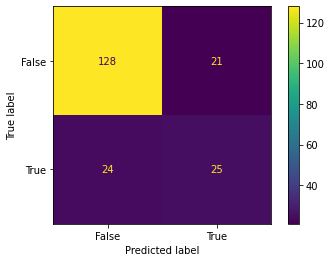

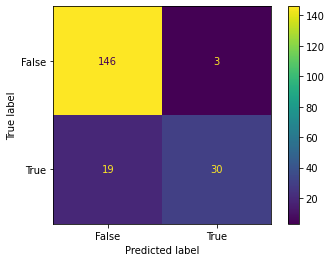

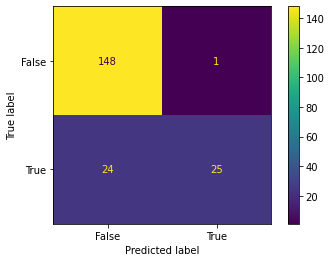

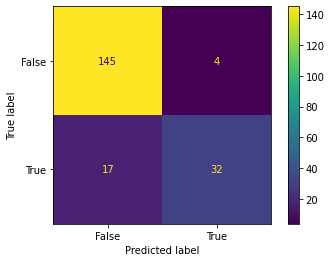

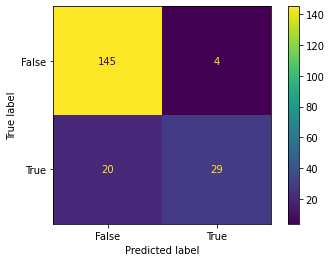

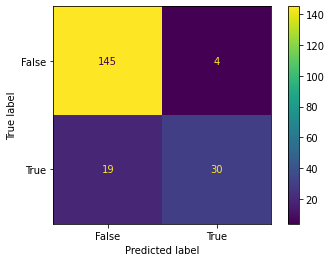

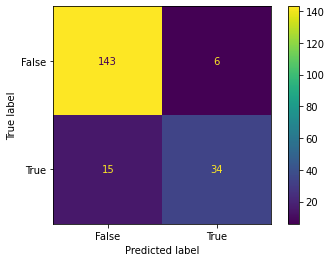

In [ ]:
models = [tree.DecisionTreeClassifier(), svm.SVC(), svm.NuSVC(), svm.LinearSVC(), RidgeClassifier(), LogisticRegression(), 
            MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)]
best_f1 = 0
best_model = ''

for model in models:
  model.fit(X_train, Y_train)
  prediction = model.predict(X_test)
  confusion_matrix = metrics.confusion_matrix(Y_test, prediction)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
  cm_display.plot()
  f1 = metrics.f1_score(Y_test, prediction)
  if(f1>best_f1):
    best_model = model

  print(type(model).__name__ + ': ' + str(f1*100))

In [ ]:
new_df = pd.read_csv('new-supplier-data.csv')
new_df = new_df.set_index('Supplier ID')
new_df['Reputation'] = new_df['Reputation'].replace(['Excellent','Good','Average','Bad'], [1,.66,.33,0])

prob_df = pd.DataFrame(best_model.predict_proba(new_df))

In [ ]:
prob_df

,0,1
0,0.938900,0.061100
1,0.559594,0.440406
2,0.969939,0.030061
3,0.975353,0.024647
4,0.329803,0.670197


In [ ]:
prob_df[1]*100

0     6.109999
1    44.040644
2     3.006107
3     2.464658
4    67.019658
Name: 1, dtype: float64

<a href="https://colab.research.google.com/github/manugupta-or/Coursera_aiscm/blob/main/Vivo_supplier_selection_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vivo Supplier Selection Problem

In [ ]:

#storing data
discounts = [
    [7, 22, 25, 34, 35],
    [30, 18, 18, 31, 26],
    [21, 30, 34, 12, 14],
    [27, 29, 30, 60, 6],
    [31, 25, 10, 13, 30],
    [23, 32, 15, 60, 9],
    [6, 21, 18, 60, 28],
    [17, 18, 6, 8, 31]
]

# discounts = [
#     [0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0]
#   ]

demand = [592, 446, 548, 647, 245, 797, 603, 401]
list_price = [870, 630, 960, 400, 980, 510, 830, 550]
fixed_admin_cost = 50000
risk_cost_rate = 60000
reliability = 0.8
num_product = len(discounts)
num_supplier = len(discounts[1])

discounted_price = np.zeros(40).reshape(num_product,num_supplier)
for i in range(num_product):
  for j in range(num_supplier):
    discounted_price[i][j] = (1-(discounts[i][j])/100) * list_price[i]

print(discounted_price)

# Create the mip solver with the SCIP backend.
solver = pywraplp.Solver.CreateSolver('SCIP')

[[809.1 678.6 652.5 574.2 565.5]
 [441.  516.6 516.6 434.7 466.2]
 [758.4 672.  633.6 844.8 825.6]
 [292.  284.  280.  160.  376. ]
 [676.2 735.  882.  852.6 686. ]
 [392.7 346.8 433.5 204.  464.1]
 [780.2 655.7 680.6 332.  597.6]
 [456.5 451.  517.  506.  379.5]]


In [ ]:
#Create the decision variables 
infinity = solver.infinity()

y = {} #binary decision variable
for j in range(num_supplier):
    y[j] = solver.IntVar(0, 1, 'y[%i]' % (j+1))
print(y)

x_var = {} #Decision variable for the quantity of ith Product from jth Supplier 
k = 0
for i in range(num_product):
  x_var[i] = [solver.IntVar(0, infinity, 'X[%d][%d]' %((i+1),(j+1))) for j in range(num_supplier)]
 # k=k+1

print(x_var)
print(type(x_var))

import pandas as pd
pd_frame = pd.DataFrame.from_dict(x_var)
print(pd_frame.transpose())

print('Number of variables =', solver.NumVariables())

#      x_var[i] = [solver.IntVar(0, infinity, 'Supplier %d, Product %d' %((i+1),(y+1))) for y in range(len(data_arr['requirements']))]


{0: y[1], 1: y[2], 2: y[3], 3: y[4], 4: y[5]}
{0: [X[1][1], X[1][2], X[1][3], X[1][4], X[1][5]], 1: [X[2][1], X[2][2], X[2][3], X[2][4], X[2][5]], 2: [X[3][1], X[3][2], X[3][3], X[3][4], X[3][5]], 3: [X[4][1], X[4][2], X[4][3], X[4][4], X[4][5]], 4: [X[5][1], X[5][2], X[5][3], X[5][4], X[5][5]], 5: [X[6][1], X[6][2], X[6][3], X[6][4], X[6][5]], 6: [X[7][1], X[7][2], X[7][3], X[7][4], X[7][5]], 7: [X[8][1], X[8][2], X[8][3], X[8][4], X[8][5]]}
<class 'dict'>
         0        1        2        3        4
0  X[1][1]  X[1][2]  X[1][3]  X[1][4]  X[1][5]
1  X[2][1]  X[2][2]  X[2][3]  X[2][4]  X[2][5]
2  X[3][1]  X[3][2]  X[3][3]  X[3][4]  X[3][5]
3  X[4][1]  X[4][2]  X[4][3]  X[4][4]  X[4][5]
4  X[5][1]  X[5][2]  X[5][3]  X[5][4]  X[5][5]
5  X[6][1]  X[6][2]  X[6][3]  X[6][4]  X[6][5]
6  X[7][1]  X[7][2]  X[7][3]  X[7][4]  X[7][5]
7  X[8][1]  X[8][2]  X[8][3]  X[8][4]  X[8][5]
Number of variables = 45


In [ ]:
#Create the constraints

# Creating reliability constraint
for i in range(num_product):
  for j in range(num_supplier):
    solver.Add(x_var[i][j] <= reliability*demand[i]*y[j])
    #p#rint(x_var[i][j])
    #print(demand[i])
   # print(y[j])

#Creating demand satisfaction constraint
for i in range(num_product):
  expr = [x_var[i][j] for j in range(num_supplier)]
  solver.Add(sum(expr) >= demand[i])
  #print(expr)
  #print(sum(expr))
  #print(demand[i])

print('Number of constraints =', solver.NumConstraints())


Number of constraints = 48


In [ ]:
objective_terms = []
for i in range(num_product):
    for j in range(num_supplier):
        objective_terms.append((1-(discounts[i][j])/100) * list_price[i] * x_var[i][j])

for j in range(num_supplier):
    objective_terms.append(fixed_admin_cost  * y[j])

for k in range(num_supplier):
    objective_terms.append(risk_cost_rate  * prob_df[1][k] * y[k])

solver.Minimize(solver.Sum(objective_terms))

status = solver.Solve()

In [ ]:
if status == pywraplp.Solver.OPTIMAL:
  print('Minimum Cost Incurred to Satisfy Demand = ', solver.Objective().Value())
  print()
  display((pd.Series(y)).apply(pywraplp.Variable.solution_value))
  display((pd.DataFrame(x_var)).applymap(pywraplp.Variable.solution_value))
else:
  print('The problem does not have an optimal solution.')


Minimum Cost Incurred to Satisfy Demand =  1977231.75794889



0    1.0
1   -0.0
2    1.0
3    1.0
4    0.0
dtype: float64

,0,1,2,3,4,5,6,7
0,0.0,90.0,110.0,0.0,196.0,160.0,0.0,320.0
1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,119.0,0.0,438.0,130.0,0.0,0.0,121.0,0.0
3,473.0,356.0,0.0,517.0,49.0,637.0,482.0,81.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
